<a href="https://colab.research.google.com/github/MohammadKhaledi/ising_model_mc/blob/main/2d_ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from numpy import exp
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm

In [8]:
N = 32
mc_step = 6000000
mc_eq = 3000000
Temp = np.linspace(0.01, 4, 100)

In [9]:
def calculate_energy(config):
    energy = 0
    N = len(config)
    for i in range(0, len(config)):
        for j in range(0, len(config)):
            energy += (-1)*config[i][j]*(config[(i+1)%N][j] + 
                                         config[(i-1)%N][j] +
                                         config[i][(j+1)%N] +
                                         config[i][(j-1)%N])  
    return energy/4

In [10]:
def monte_carlo(config, temperature, en, mag):
    current_energy = en
    energy = en
    N = len(config)
    spin_x = np.random.randint(0, N)
    spin_y = np.random.randint(0, N)
    S12 = (-1)*config[spin_x][spin_y] * config[(spin_x-1)%N][spin_y]
    S23 = (-1)*config[spin_x][spin_y] * config[(spin_x+1)%N][spin_y]
    S24 = (-1)*config[spin_x][spin_y] * config[spin_x][(spin_y-1)%N]
    S25 = (-1)*config[spin_x][spin_y] * config[spin_x][(spin_y+1)%N]
    del_E = 2*(S12 + S23 + S24 + S25)
    if( (del_E >= 0) or (exp(del_E/temperature) >= np.random.uniform(0, 1)) ):
        if(S12 > 0): energy -= 1
        if(S12 < 0): energy += 1
        if(S23 > 0): energy -= 1
        if(S23 < 0): energy += 1
        if(S24 > 0): energy -= 1
        if(S24 < 0): energy += 1
        if(S25 > 0): energy -= 1
        if(S25 < 0): energy += 1
                
        config[spin_x][spin_y] = (-1)*config[spin_x][spin_y]
        S12 = (-1)*config[spin_x][spin_y] * config[(spin_x-1)%N][spin_y]
        S23 = (-1)*config[spin_x][spin_y] * config[(spin_x+1)%N][spin_y]
        S24 = (-1)*config[spin_x][spin_y] * config[spin_x][(spin_y-1)%N]
        S25 = (-1)*config[spin_x][spin_y] * config[spin_x][(spin_y+1)%N]
        current_energy = energy + S12 + S23 + S24 + S25
        mag += 2 * config[spin_x][spin_y]

    return current_energy, mag, config

In [11]:
  def magnetization(config):
      return np.sum(config)

In [12]:
Energy_tt = np.zeros(len(Temp))
Mag_tt = np.zeros(len(Temp))
C_tt = np.zeros(len(Temp))
X_tt = np.zeros(len(Temp))
for i in tqdm(range(len(Temp))):
    E = 0
    M = 0
    E2 = 0
    M2 = 0
    temp = Temp[i]
    config = 2*np.random.randint(2, size=(N, N)) - 1
    current_energy = calculate_energy(config)
    current_magentization = magnetization(config)
    
    for step in range(mc_eq):
        en, mag, config = monte_carlo(config, temp, current_energy, current_magentization)
        current_energy = en
        current_magentization = mag

    for step in range(mc_step):
        en, mag, config = monte_carlo(config, temp, current_energy, current_magentization)
        current_energy = en
        current_magentization = mag
        E += en
        E2 += en*en
        M += mag
        M2 += mag**2
        
    E /= mc_step
    M /= mc_step
    E2 /= mc_step
    M2 /= mc_step
    beta = 1/temp
    Energy_tt[i] += E/(N**2)
    Mag_tt[i] += M/(N**2)
    C_tt[i] += ( (beta**2) * (E2 - (E**2)) )/(N**2)
    X_tt[i] += (  beta * (M2 - (M**2)) )/(N**2)


100%|██████████| 100/100 [6:00:38<00:00, 216.39s/it]


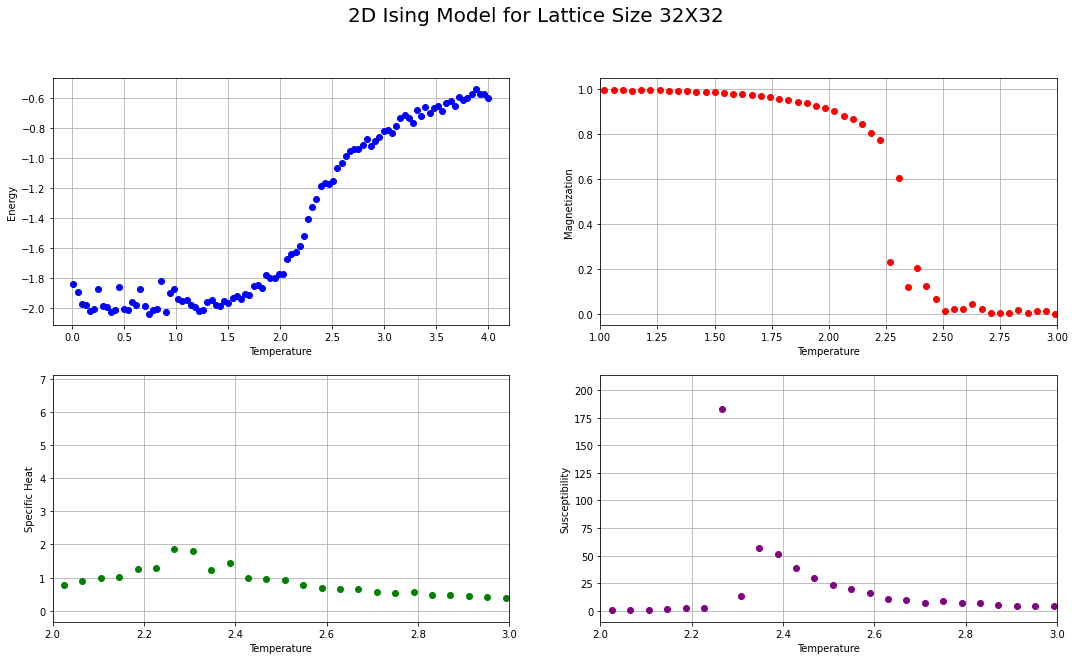

In [29]:
fig1 = figure(figsize=(18, 10))
fig1.suptitle(f'2D Ising Model for Lattice Size {32}X{32} ', fontsize=20)

ax1 = fig1.add_subplot(221)
plt.ylabel("Energy", fontsize=10)
plt.xlabel("Temperature", fontsize=10)
plt.grid()
plt.plot(Temp, Energy_tt, 'o', color='blue')

ax2 = fig1.add_subplot(222)
plt.xlim(1, 3)
plt.ylabel("Magnetization", fontsize=10)
plt.xlabel("Temperature", fontsize=10)
plt.grid()
plt.plot(Temp,np.abs(Mag_tt), 'o', color='red')

ax3 = fig1.add_subplot(223)
plt.xlim(2, 3)
plt.ylabel("Specific Heat", fontsize=10)
plt.xlabel("Temperature", fontsize=10)
plt.plot(Temp, C_tt, 'o', color='green')
plt.grid()

ax4 = fig1.add_subplot(224)
plt.xlim(2, 3)
plt.ylabel("Susceptibility", fontsize=10)
plt.xlabel("Temperature", fontsize=10)
plt.plot(Temp, X_tt, 'o', color='purple')
plt.grid()